In [201]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import zscore
from umap import UMAP

In [121]:
text_features_df = pd.read_hdf('../data/weebit/weebit.h5', 'text_features_df')
feature_y_mask = (text_features_df.columns.str.startswith('feature_')) | (text_features_df.columns == 'y')
data = text_features_df.loc[:, feature_y_mask]

## Features Statistics

In [185]:
data.drop('y', 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature_adj,3636.0,0.076403,0.029505,0.000000,0.058186,0.075167,0.093993,0.218750
feature_adverbs,3636.0,0.518306,0.284784,0.000000,0.333333,0.500000,0.666667,3.000000
feature_avgnpsize,3636.0,2.935227,0.614295,1.000000,2.555556,2.883156,3.260357,9.875000
feature_avgparsetreeheight,3636.0,5.591294,1.075038,2.000000,4.857143,5.571429,6.285714,10.333333
feature_avgppsize,3636.0,4.103977,1.059090,0.000000,3.500000,4.000000,4.623463,11.714286
feature_avgvpsize,3636.0,6.786518,1.695810,0.000000,5.736455,6.666667,7.700000,22.583333
feature_conj,3636.0,0.099080,0.026367,0.000000,0.082868,0.099241,0.114943,0.250000
feature_interj,3636.0,0.007128,0.027863,0.000000,0.000000,0.000000,0.000000,0.571429
feature_modals,3636.0,0.160147,0.154682,0.000000,0.041667,0.125000,0.238095,1.000000
feature_nouns,3636.0,0.278827,0.052950,0.072727,0.247525,0.278157,0.306228,0.682759


## Features Correlations

In [127]:
fs_corr_df = data.drop('y', 1).corr()

In [128]:
fs_single_corrs = (fs_corr_df.unstack()
                     .sort_values(ascending=False)
                         [len(fs_corr_df):][::2])

In [129]:
fs_single_corrs.head(10)

feature_numconstituents     feature_senlen                0.920825
                            feature_avgparsetreeheight    0.903634
feature_numnp               feature_senlen                0.887388
feature_numconstituents     feature_numfuncwords          0.870925
feature_senlen              feature_numfuncwords          0.862974
feature_numnp               feature_numconstituents       0.854490
feature_perpro              feature_pronouns              0.832053
feature_senlen              feature_avgparsetreeheight    0.823100
feature_numconstituents     feature_numvp                 0.812639
feature_avgparsetreeheight  feature_numfuncwords          0.794654
dtype: float64

In [130]:
fs_single_corrs.tail(10)

feature_ver       feature_conj        -0.325900
feature_nouns     feature_numvp       -0.330591
feature_numdet    feature_pronouns    -0.334298
feature_numvb     feature_nouns       -0.355401
feature_pronouns  feature_avgnpsize   -0.368485
feature_nouns     feature_adverbs     -0.375893
feature_pronouns  feature_nouns       -0.414336
feature_nouns     feature_ver         -0.446563
                  feature_perpro      -0.470266
feature_ver       feature_avgnpsize   -0.489839
dtype: float64

In [131]:
fs_single_corrs[(fs_single_corrs < 0.01) & (fs_single_corrs > -0.01)]

feature_numwh        feature_avgppsize      0.007948
feature_avgppsize    feature_whpro          0.006932
feature_numprep      feature_whpro          0.006802
feature_num_comma    feature_nouns          0.005917
feature_avgppsize    feature_interj         0.005758
feature_interj       feature_whpro          0.005500
feature_numvbp       feature_numvbn         0.005434
feature_numnp        feature_numvb          0.005251
feature_numvbg       feature_adj            0.005169
feature_avgppsize    feature_numvb          0.004828
feature_numpp        feature_perpro         0.003832
feature_numprep      feature_propernouns    0.002024
feature_avgvpsize    feature_interj         0.001637
feature_numvbn       feature_numwh          0.001586
feature_numwh        feature_numnp          0.001377
feature_numvbg       feature_interj         0.001282
feature_numsbar      feature_avgnpsize      0.001078
feature_pronouns     feature_numvbd        -0.000193
feature_interj       feature_modals        -0.

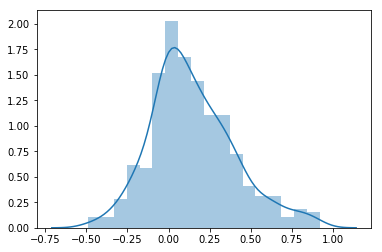

In [132]:
sns.distplot(fs_single_corrs)

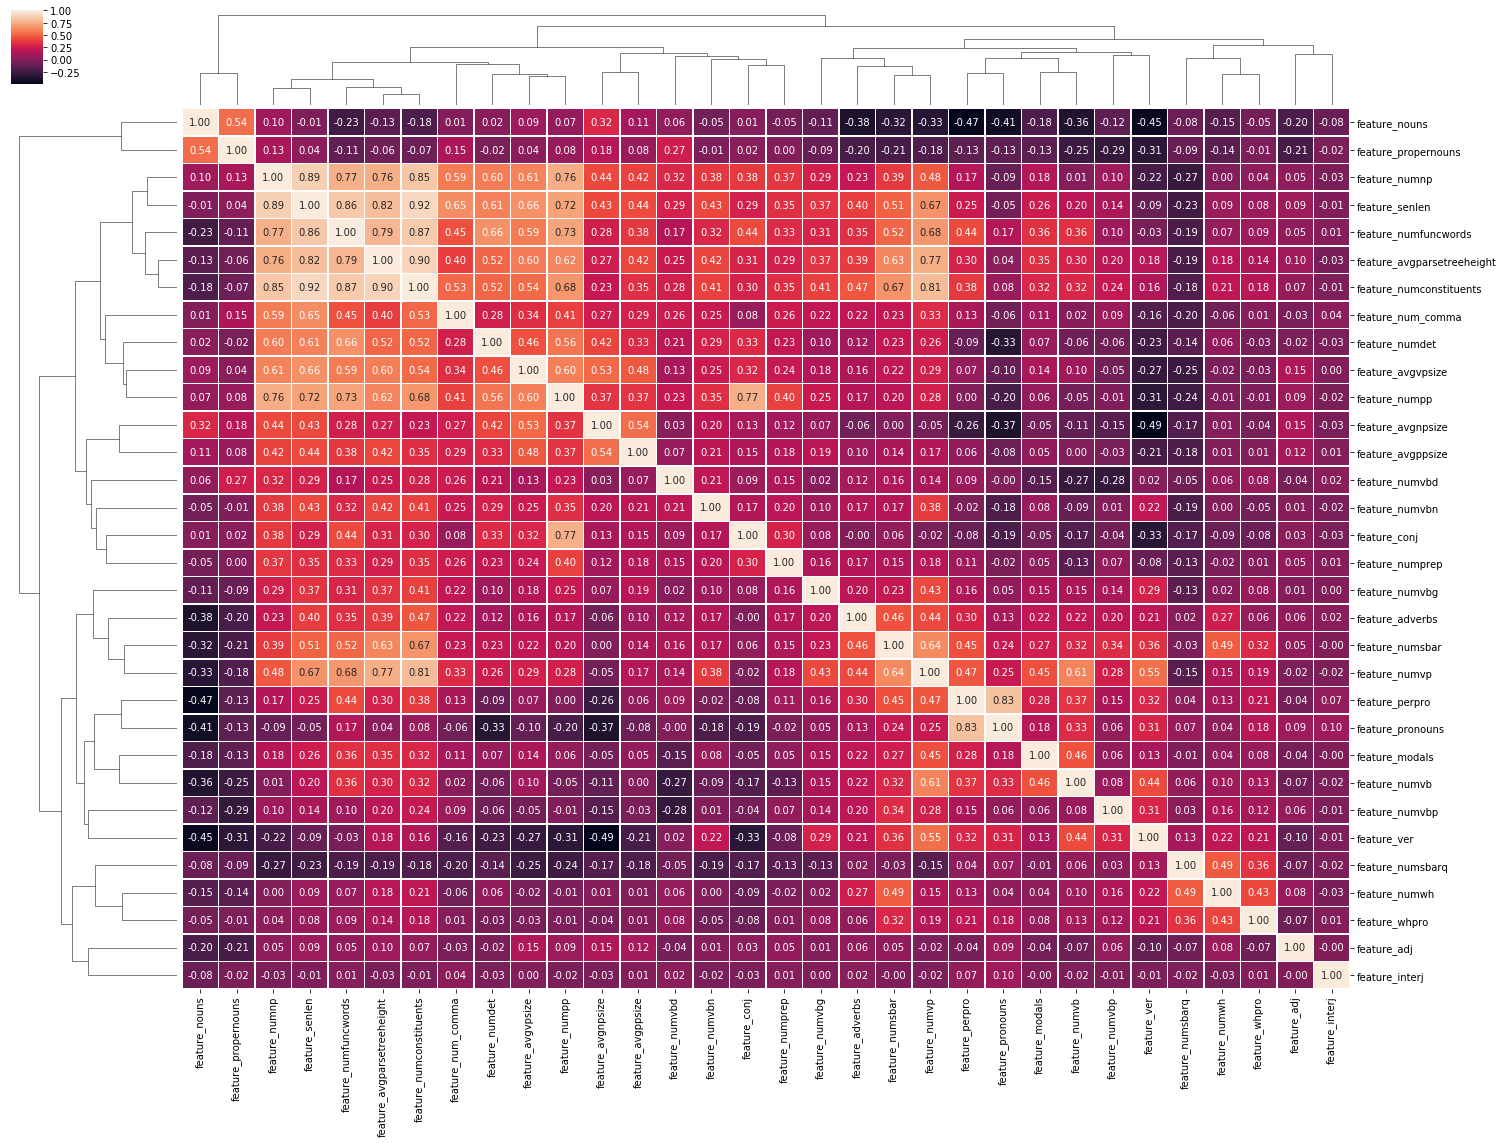

In [133]:
features_clustering = sns.clustermap(fs_corr_df, annot=True, fmt='0.2f', linewidths=.5, figsize=(24, 18))

In [142]:
data = data[np.take(data.columns,
                                  [0] + [i+1 for i in features_clustering.dendrogram_col.reordered_ind])]

,y,feature_nouns,feature_propernouns,feature_numnp,feature_senlen,feature_numfuncwords,feature_avgparsetreeheight,feature_numconstituents,feature_num_comma,feature_numdet,...,feature_pronouns,feature_modals,feature_numvb,feature_numvbp,feature_ver,feature_numsbarq,feature_numwh,feature_whpro,feature_adj,feature_interj
0,4,0.173077,0.019231,4.700000,15.600000,6.000000,7.000000,13.500000,0.200000,1.000000,...,0.160256,0.300000,0.700000,0.000000,0.179487,0.000000,0.100000,0.000000,0.108974,0.000000
1,4,0.218978,0.051095,3.083333,11.416667,4.250000,5.333333,10.166667,0.333333,1.416667,...,0.080292,0.166667,0.916667,0.416667,0.153285,0.000000,0.083333,0.083333,0.029197,0.083333
2,4,0.252252,0.063063,3.461538,11.384615,3.512821,4.692308,9.871795,0.615385,0.641026,...,0.047297,0.051282,0.384615,0.205128,0.162162,0.076923,0.128205,0.102564,0.022523,0.025641
3,4,0.300000,0.033333,4.333333,10.000000,2.000000,5.333333,8.333333,0.000000,0.333333,...,0.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.333333,0.000000,0.066667,0.000000
4,4,0.231638,0.039548,3.600000,11.800000,3.266667,5.333333,9.200000,0.400000,1.066667,...,0.039548,0.000000,0.666667,0.266667,0.186441,0.066667,0.266667,0.066667,0.079096,0.000000
5,4,0.239521,0.011976,4.909091,15.181818,5.818182,6.818182,14.272727,0.545455,1.454545,...,0.089820,0.272727,2.090909,0.454545,0.191617,0.000000,0.363636,0.090909,0.071856,0.000000
6,4,0.397436,0.128205,2.666667,8.666667,2.777778,4.000000,5.666667,0.111111,0.888889,...,0.038462,0.000000,0.555556,0.000000,0.076923,0.000000,0.000000,0.000000,0.051282,0.000000
7,4,0.331373,0.107843,3.040816,10.408163,2.714286,4.469388,7.795918,0.346939,0.510204,...,0.072549,0.081633,0.632653,0.489796,0.160784,0.081633,0.224490,0.081633,0.054902,0.061224
8,4,0.177665,0.025381,3.200000,9.850000,2.800000,4.550000,9.100000,0.250000,0.900000,...,0.050761,0.150000,0.650000,0.300000,0.157360,0.000000,0.150000,0.000000,0.050761,0.050000
9,4,0.292135,0.050562,5.846154,13.692308,4.923077,6.000000,11.923077,0.307692,2.000000,...,0.022472,0.076923,0.076923,0.153846,0.101124,0.000000,0.076923,0.000000,0.078652,0.000000


LinAlgError: singular matrix

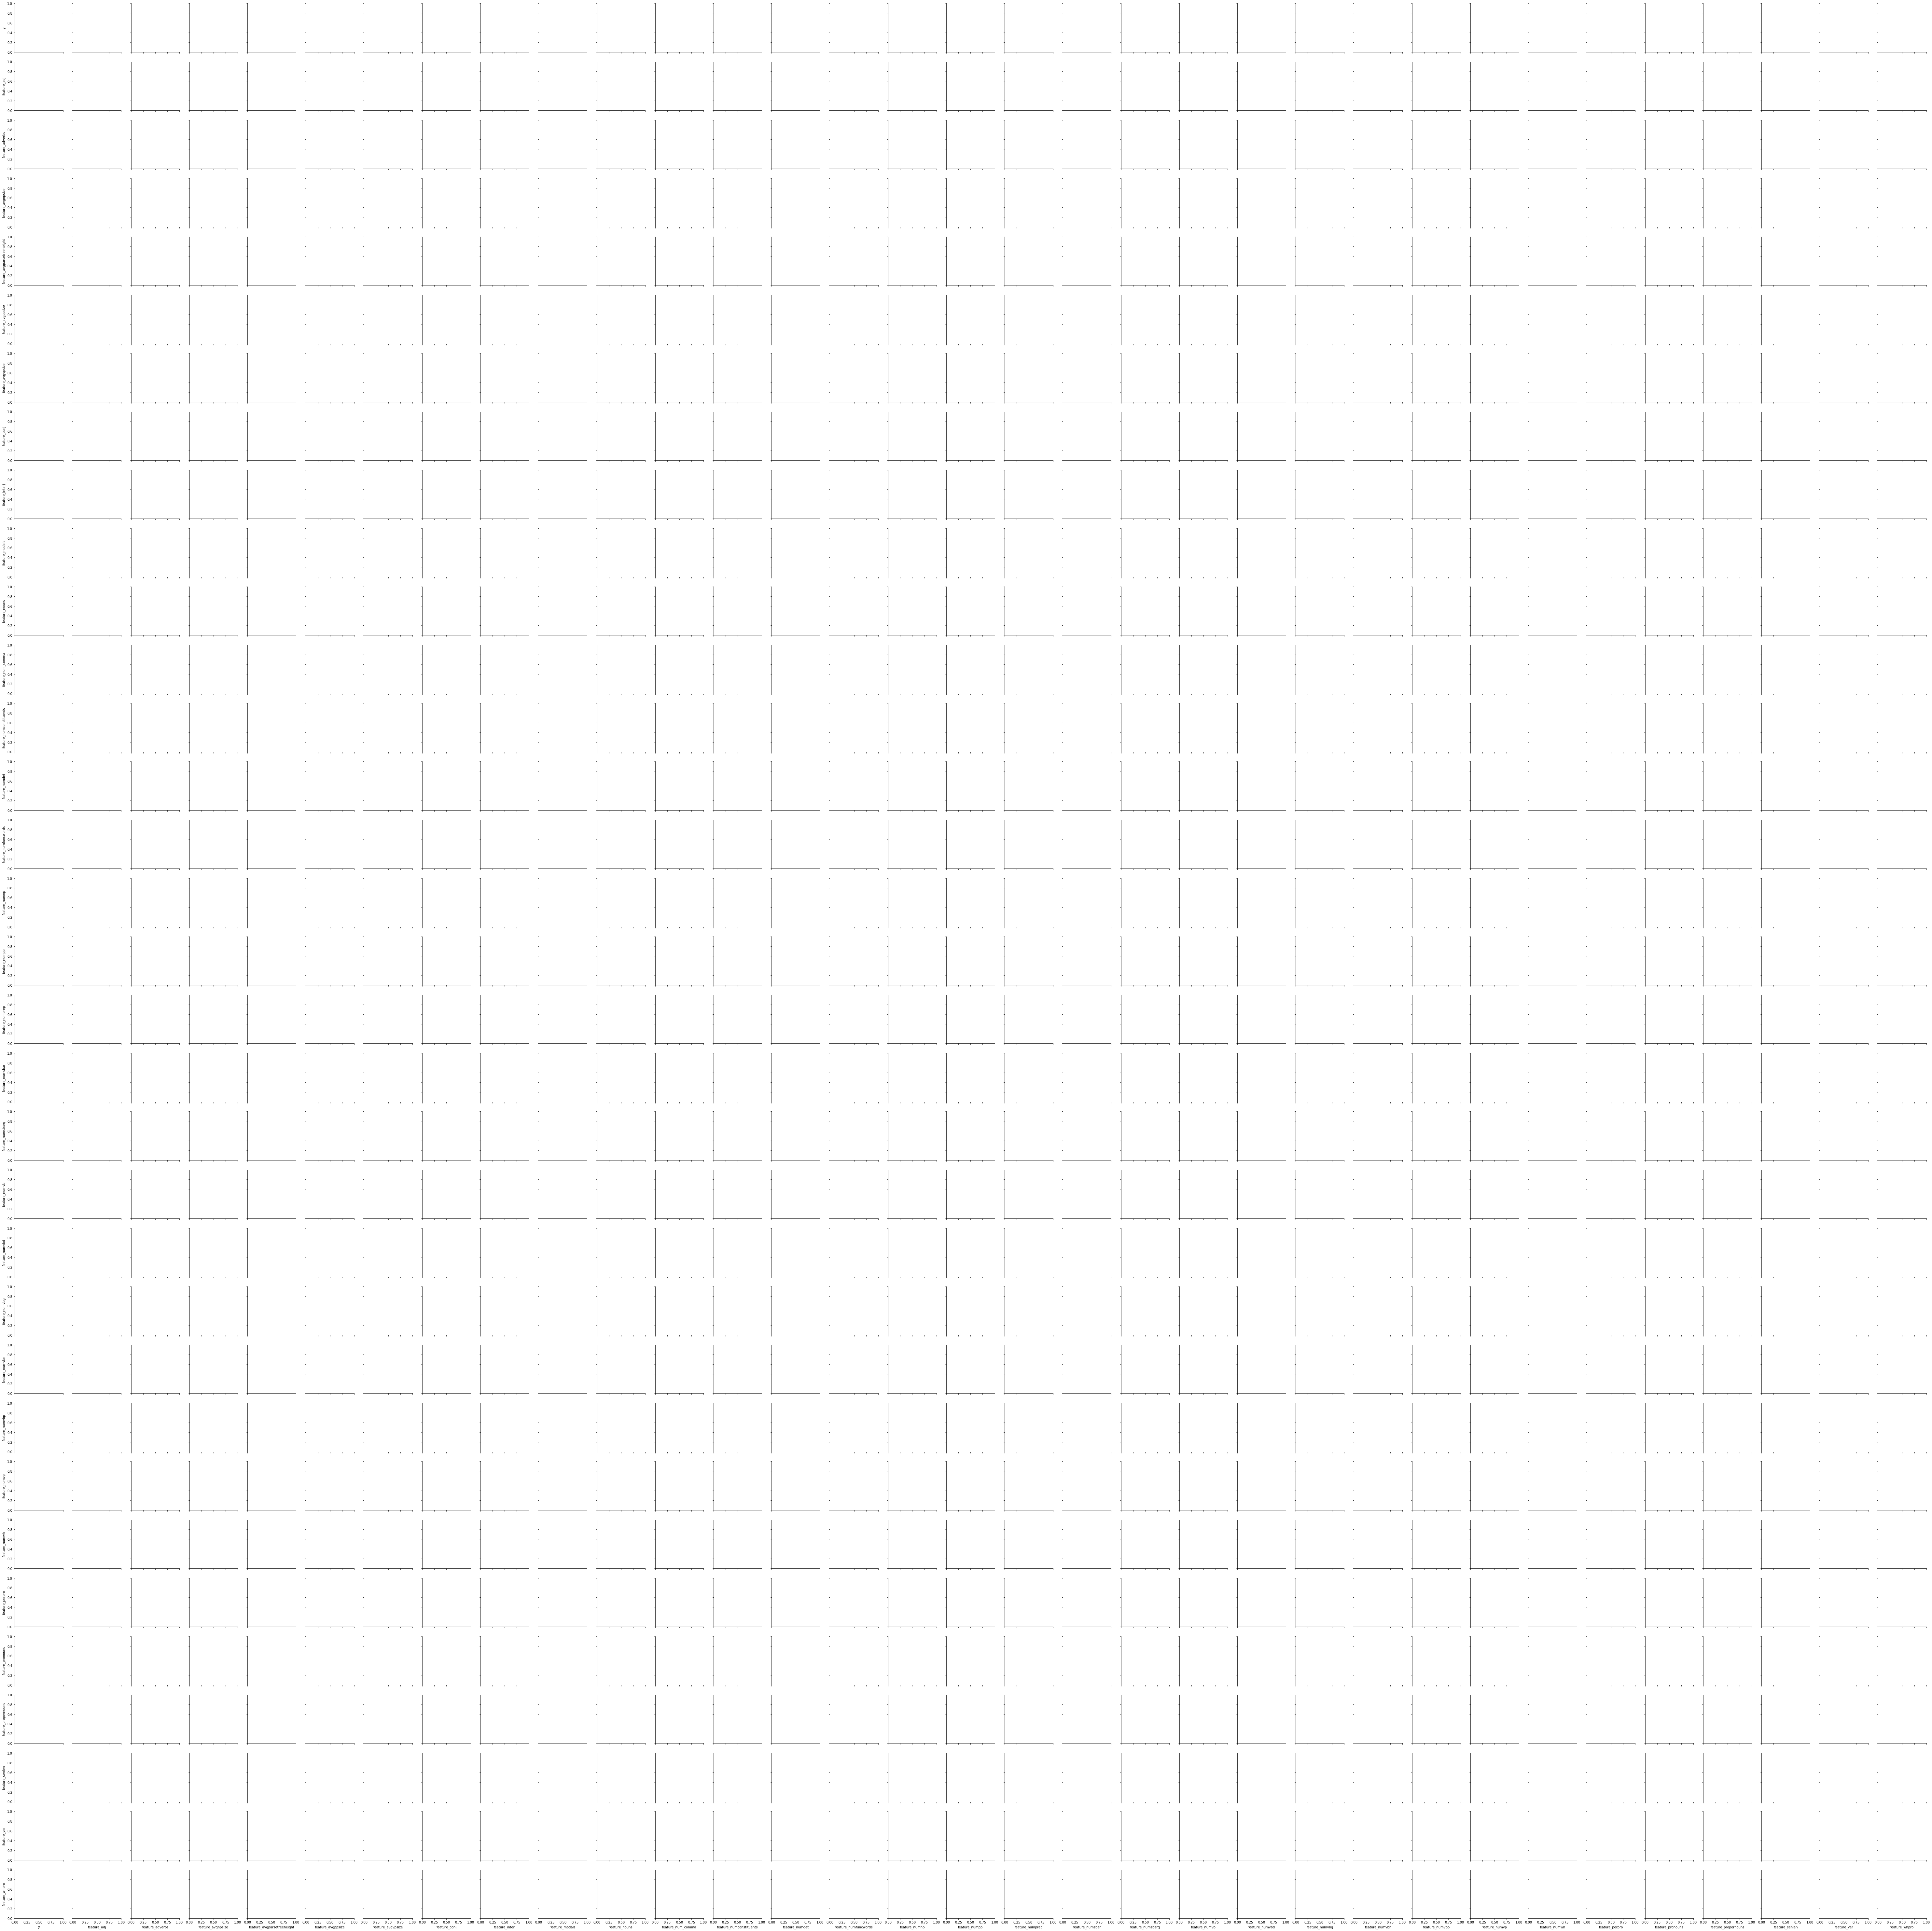

In [155]:
sns.pairplot(data, hue='y')

## UMAP & t-SNE

In [ ]:
tsne_embedding = TSNE().fit_transform(data.drop('y', 1))
f, ax = plt.subplots(figsize=(20, 20))
ax.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=[sns.color_palette()[x] for x in data['y']], label=data['y'])#, s=4)
f.gca().set_aspect('equal', 'datalim')

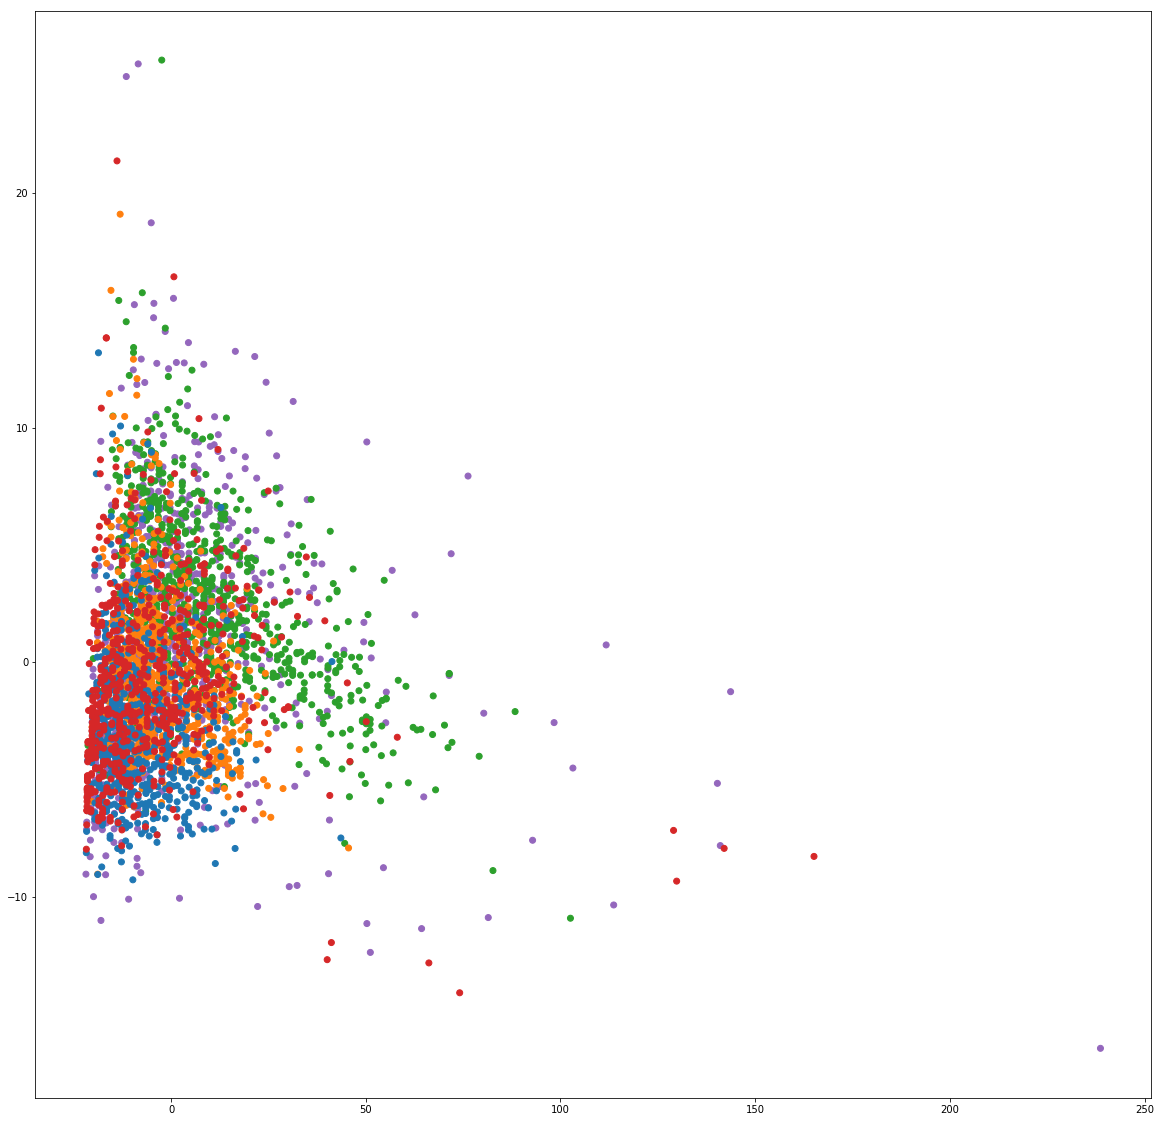

In [203]:
pca_embedding = PCA().fit_transform(data.drop('y', 1))
f, ax = plt.subplots(figsize=(20, 20))
ax.scatter(pca_embedding[:, 0], pca_embedding[:, 1],
            c=[sns.color_palette()[x] for x in data['y']], label=data['y'])#, s=4)
#f.gca().set_aspect('equal', 'datalim')

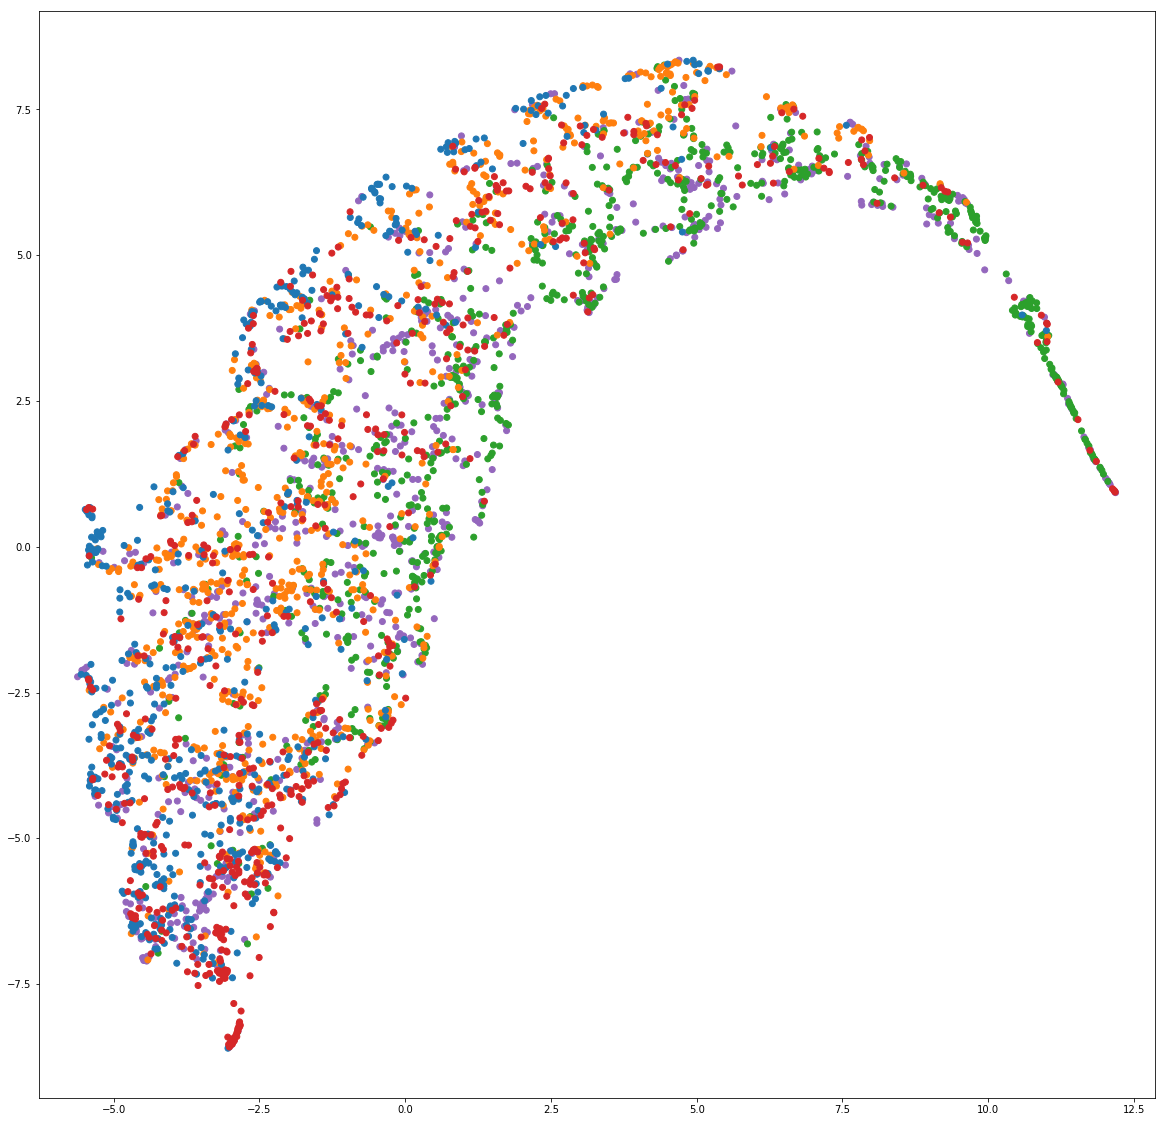

In [198]:
umap_embedding = UMAP().fit_transform(data.drop('y', 1))
f, ax = plt.subplots(figsize=(20, 20))
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1],
            c=[sns.color_palette()[x] for x in data['y']], label=data['y'])#, s=4)
f.gca().set_aspect('equal', 'datalim')

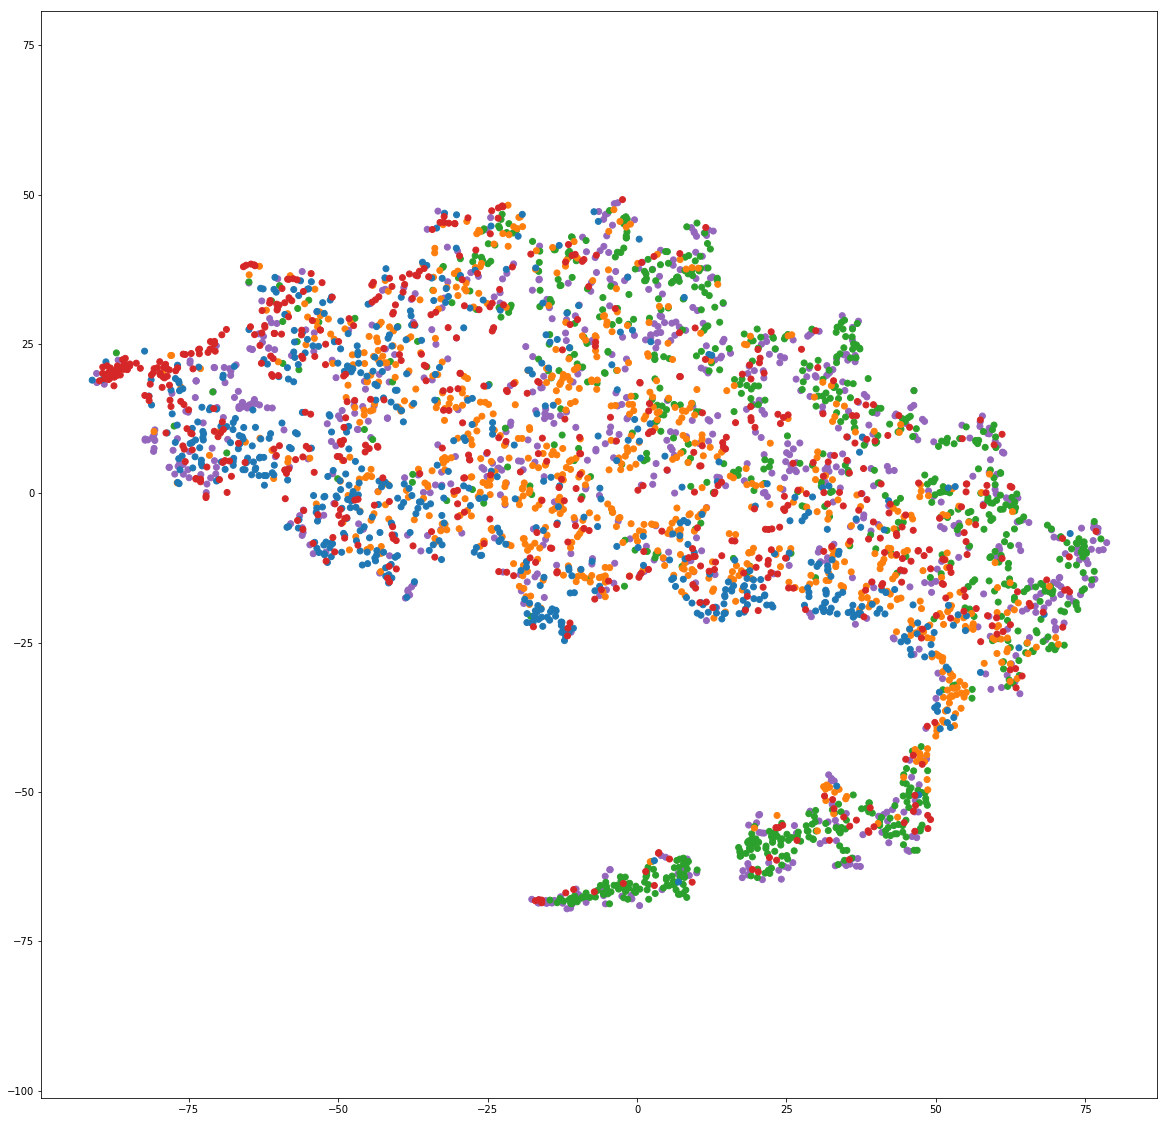

In [200]:
tsne_embedding = TSNE().fit_transform(data.drop('y', 1))
f, ax = plt.subplots(figsize=(20, 20))
ax.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=[sns.color_palette()[x] for x in data['y']], label=data['y'])#, s=4)
f.gca().set_aspect('equal', 'datalim')

In [252]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [294]:
y, X = np.hsplit(data.as_matrix(), [1])
X = zscore(X, axis=0)
y = y.flatten()
y_hotone = keras.utils.to_categorical(y)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [295]:
linear_svm = SGDClassifier()
linear_svm.fit(X, y)
linear_svm.score(X, y)

/home/users/shlohod/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5404290429042904

In [297]:
rbf_svm = SVC()
rbf_svm.fit(X, y)
rbf_svm.score(X, y)

0.8091309130913091

In [309]:
for C in 10.**np.arange(-3, 3):
    rbf_svm = SVC(C=C)
    rbf_svm.fit(X, y)
    print('C =', C, 'score =', rbf_svm.score(X, y))

C = 0.001 score = 0.22002200220022003
C = 0.01 score = 0.4551705170517052
C = 0.1 score = 0.6603410341034104
C = 1.0 score = 0.8091309130913091
C = 10.0 score = 0.9463696369636964
C = 100.0 score = 0.9988998899889989


array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [261]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [285]:
model = Sequential()
model.add(Dense(64, input_shape=(32,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [288]:
model.fit(X, y_hotone, epochs=100, batch_size=None)

Epoch 1/100
3636/3636 [==============================] - 0s 136us/step - loss: 0.8564 - acc: 0.6502
Epoch 2/100
3636/3636 [==============================] - 0s 130us/step - loss: 0.8521 - acc: 0.6535
Epoch 3/100
3636/3636 [==============================] - 0s 137us/step - loss: 0.8649 - acc: 0.6496
Epoch 4/100
3636/3636 [==============================] - 0s 134us/step - loss: 0.8408 - acc: 0.6625
Epoch 5/100
3636/3636 [==============================] - 0s 133us/step - loss: 0.8348 - acc: 0.6620
Epoch 6/100
3636/3636 [==============================] - 0s 135us/step - loss: 0.8329 - acc: 0.6680
Epoch 7/100
3636/3636 [==============================] - 1s 139us/step - loss: 0.8311 - acc: 0.6647
Epoch 8/100
3636/3636 [==============================] - 1s 142us/step - loss: 0.8243 - acc: 0.6661
Epoch 9/100
3636/3636 [==============================] - 0s 125us/step - loss: 0.8165 - acc: 0.6724
Epoch 10/100
3636/3636 [==============================] - 1s 138us/step - loss: 0.8014 - acc: 0.6744

KeyboardInterrupt: 